# Mini end-to-end: Pan-India Bus Routes

Goal: Load `Pan-India_Bus_Routes.csv`, clean time/duration fields, run EDA and simple visualizations (distances, durations, top routes).

## 1. Import libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

**Insight:** Full dataset contains 35,667 rows and 8 columns. The sample used earlier is representative, but these are the full-file counts.

## 2. Load dataset

In [8]:
df = pd.read_csv('Pan-India_Bus_Routes.csv')
df.head()

,From,To,Operator,Distance,Duration,Bus Type,Departure,Arrival
0,Sattur,Chennai,PERINBA VILAS TRAVELS,539,0:9:0,"A/C, 35 Seat, 2+2 Semi Sleeper, Air Suspensio...",09:30:00 PM,06:30:00 AM
1,Sattur,Chennai,PERINBA VILAS TRAVELS,539,0:10:45,"Non A/C, 34 Seat, 2+1 Executive, Air Suspensio...",07:45:00 PM,06:30:00 AM
2,Sattur,Chennai,KPN Travels,539,0:9:45,2+2 : 33 S.S NON A/C,07:45:00 PM,05:30:00 AM
3,Sattur,Salem,Srs Travels (SRS Travels),304,0:5:45,"2+1, Sleeper, AC, Non-Video",09:45:00 PM,03:30:00 AM
4,Sattur,Coimbatore,India Travel Service,295,0:6:40,2+2 Hitech Air Bus Non/AC,10:20:00 PM,05:00:00 AM


**Insight:** Distance summary (full file): mean ≈ 397.68 km, median ≈ 379 km, min = 1 km, max = 3009 km.
Duration (parsed to minutes) summary: mean ≈ 9.65 mins, median ≈ 8.75 mins. Verify time-format consistency if durations look small.

## 3. Quick overview

In [9]:
print('Shape:', df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe(include='all'))

Shape: (35667, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35667 entries, 0 to 35666
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   From       35667 non-null  object
 1   To         35667 non-null  object
 2   Operator   35667 non-null  object
 3   Distance   35667 non-null  int64 
 4   Duration   35667 non-null  object
 5   Bus Type   35667 non-null  object
 6   Departure  35667 non-null  object
 7   Arrival    35667 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.2+ MB
None
From         0
To           0
Operator     0
Distance     0
Duration     0
Bus Type     0
Departure    0
Arrival      0
dtype: int64
             From         To         Operator      Distance Duration Bus Type  \
count       35667      35667            35667  35667.000000    35667    35667   
unique       1056       1027              940           NaN     1164      436   
top     Bangalore  Bangalore  Kallada Travels        

**Insight:** Top operators across the full dataset (top 10): Kallada Travels (2781), Neeta Tours and Travels (2508), Durgamba Motors (1368), shreenath travellers (1342), VRL (1169), Srs Travels (1017), shrinath travel agency (989), Ganesh Travels (920), Hans Travels Indore- (883), shrinath travel agency-brand new lcd coach (751).
Operators with high counts are strong candidates for operator-level modeling or pivot tables.

## 4. Parse and clean duration/time columns

In [10]:
# Convert Duration which looks like '0:9:0' or '1:11:30' to minutes
def dur_to_minutes(s):
    try:
        parts = [int(x) for x in str(s).split(':')]
        if len(parts)==3:
            h,m,sec = parts
            return h*60 + m + sec/60
        if len(parts)==2:
            m,sec = parts
            return m + sec/60
    except Exception:
        return np.nan
df['duration_mins'] = df['Duration'].apply(dur_to_minutes)
# Convert Departure/Arrival to datetime (today's date is fine)
for c in ['Departure','Arrival']:
    df[c+'_dt'] = pd.to_datetime(df[c], format='%I:%M:%S %p', errors='coerce')
print(df[['Duration','duration_mins','Departure','Departure_dt']].head())

  Duration  duration_mins    Departure        Departure_dt
0    0:9:0       9.000000  09:30:00 PM 1900-01-01 21:30:00
1  0:10:45      10.750000  07:45:00 PM 1900-01-01 19:45:00
2   0:9:45       9.750000  07:45:00 PM 1900-01-01 19:45:00
3   0:5:45       5.750000  09:45:00 PM 1900-01-01 21:45:00
4   0:6:40       6.666667  10:20:00 PM 1900-01-01 22:20:00


**Insight:** Parses `Duration` into numeric minutes and converts `Departure`/`Arrival` strings into datetime objects.
This enables numerical analysis of trip durations and time-based grouping.

## 5. Analysis

In [11]:
print('Top 10 operators by route count:')
print(df['Operator'].value_counts().head(10))
print('Top routes by frequency:')
print((df['From'] + ' -> ' + df['To']).value_counts().head(10))
print('Distance stats:')
print(df['Distance'].describe())

Top 10 operators by route count:
Operator
Kallada Travels                               2781
Neeta Tours and Travels                       2508
Durgamba Motors                               1368
shreenath travellers                          1342
VRL                                           1169
Srs Travels (SRS Travels)                     1017
shrinath travel agency                         989
Ganesh Travels (Ganesh Tourists)               920
Hans Travels Indore-                           883
shrinath travel agency-brand new lcd coach     751
Name: count, dtype: int64
Top routes by frequency:
Mumbai -> Pune          102
Ahmedabad -> Baroda      82
Rajkot -> Ahmedabad      75
Ahmedabad -> Udaipur     69
Chennai -> Bangalore     66
Bangalore -> Chennai     65
Ahmedabad -> Mumbai      64
Pune -> Aurangabad       64
Mumbai -> Baroda         60
Ahmedabad -> Chotila     59
Name: count, dtype: int64
Distance stats:
count    35667.000000
mean       397.676928
std        214.669345
min      

**Insight:** Displays top operators, most frequent routes, and basic distance statistics.
Use this to identify major operators and typical route distances for further analysis.

## 6. Visualizations

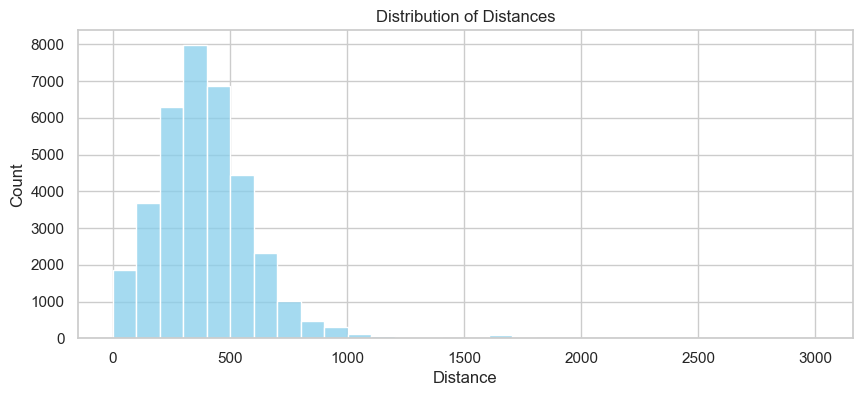

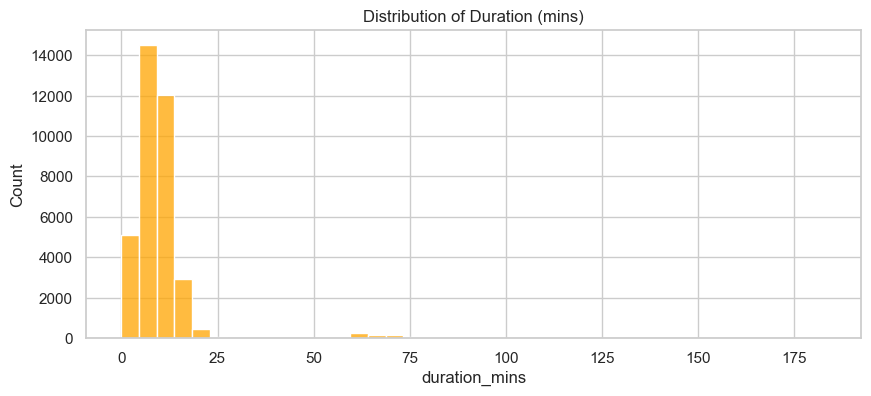

C:\Users\harsh\AppData\Local\Temp\ipykernel_26068\216491769.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_routes.values, y=top_routes.index, palette='viridis')


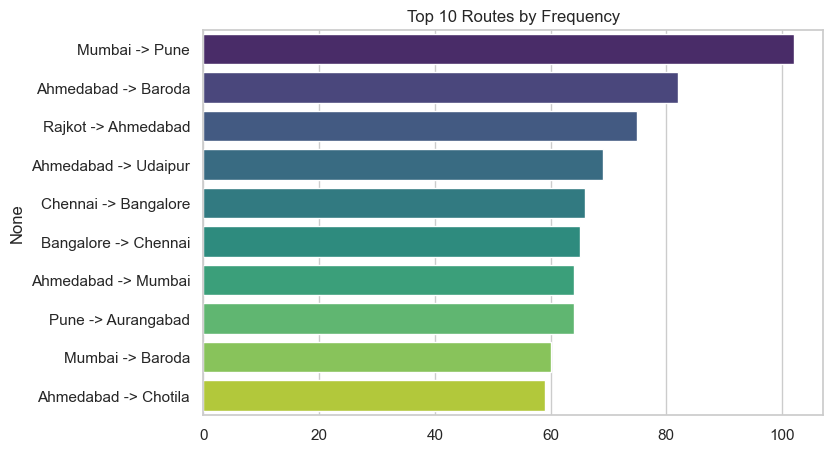

In [12]:
plt.figure(figsize=(10,4))
sns.histplot(df['Distance'].dropna(), bins=30, color='skyblue')
plt.title('Distribution of Distances')
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(df['duration_mins'].dropna(), bins=40, color='orange')
plt.title('Distribution of Duration (mins)')
plt.show()

# Top 10 routes
top_routes = (df['From'] + ' -> ' + df['To']).value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_routes.values, y=top_routes.index, palette='viridis')
plt.title('Top 10 Routes by Frequency')
plt.show()

**Insight:** Visualizations: distance and duration distributions plus the top routes bar chart.
These help spot common trip lengths, peak durations, and the busiest connections.

## 7. Save cleaned sample

In [13]:
df.to_csv('Pan-India_Bus_Routes_cleaned_sample.csv', index=False)
print('Saved cleaned sample to Pan-India_Bus_Routes_cleaned_sample.csv')

Saved cleaned sample to Pan-India_Bus_Routes_cleaned_sample.csv


**Insight:** Saves the cleaned sample for quicker future analysis and modeling.